这里实现一个encoder层

我这里基于Attention is all you need 和网上的3blue来实现Transformer

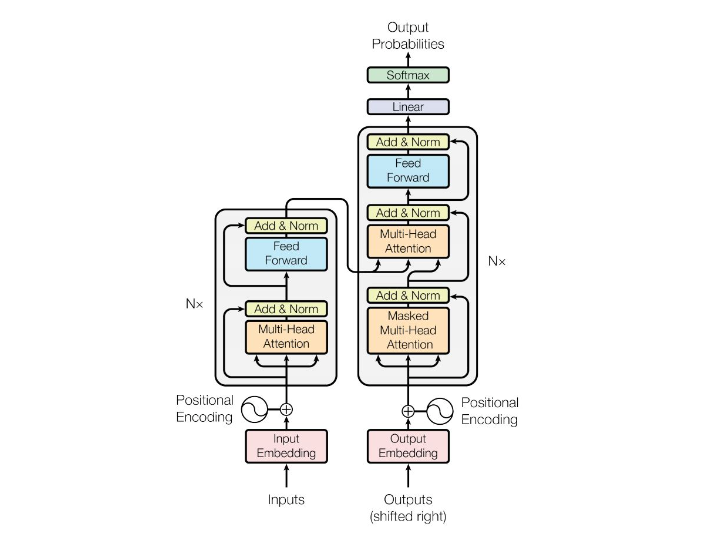



我们思考一个Transformer encoder层，需要写什么类和函数：

1. 将input（Sequence）转为 input Embedding 的函数。
2. 往input Embedding 中加入Positional Encoding信息的函数
3. Transformer layer 类，共创建n个就可以
4. 每个Transformer layer类中，有MHA函数，layer Norm函数，FFN函数

以下代码实现参考了https://xiaosheng.blog/2022/06/28/use-pytorch-to-implement-transformer 

首先实现token到embedding的映射

In [1]:
# 首先实现token到embedding的映射
from torch import nn
from transformers import AutoConfig
from transformers import AutoTokenizer

AutoTokenizer是hugging_face的自动处理Token的分词器。


In [7]:
# 这里先对AutoTokenizer进行测试
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
text = "What can i say? mamba out!"

# 将text转为Token：
tokens = tokenizer.tokenize(text)
print(f'tokens:{tokens}')

# 将token转为token IDs
tokens_id = tokenizer.convert_tokens_to_ids(tokens)
print(f'tokens_id:{tokens_id}')

# 我们可以直接调用tokenizer方法，来将text直接转为token_id：
encoded_input = tokenizer(text)
print(f'encoded_input:{encoded_input}')

d:\programfiles\Anaconda\anaconda\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokens:['what', 'can', 'i', 'say', '?', 'ma', '##mba', 'out', '!']
tokens_id:[2054, 2064, 1045, 2360, 1029, 5003, 11201, 2041, 999]
encoded_input:{'input_ids': [101, 2054, 2064, 1045, 2360, 1029, 5003, 11201, 2041, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
